In [1]:
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random
import matplotlib as mtpl
from matplotlib import pyplot as plt

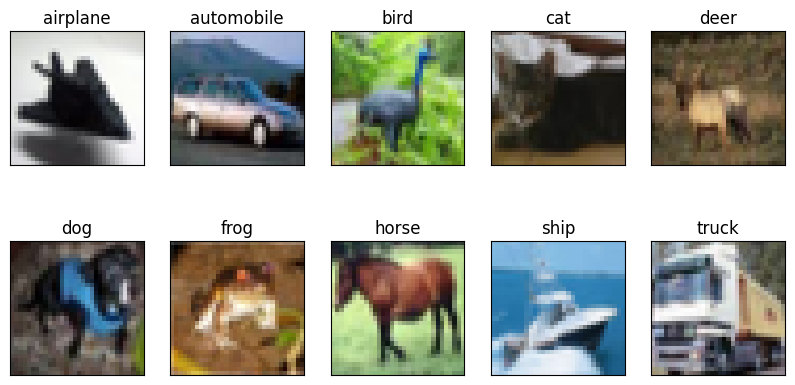

In [30]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = (y_train == i).nonzero()[0][0]
    ax.imshow(x_train[idx])
    ax.set_title(class_names[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


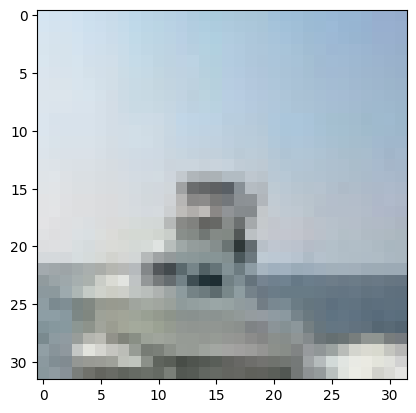

In [4]:
im_class = []
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
plt.imshow(x_train[100])
# for i in range(len(image_n)):
#   im_class.append(image_n[i == class_n])


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

train_counts = [0] * len(class_names)
for y in y_train:
    train_counts[y[0]] += 1

test_counts = [0] * len(class_names)
for y in y_test:
    test_counts[y[0]] += 1

for i in range(len(class_names)):
    print(f"{class_names[i]}: {train_counts[i]} train images, {test_counts[i]} test images")

airplane: 5000 train images, 1000 test images
automobile: 5000 train images, 1000 test images
bird: 5000 train images, 1000 test images
cat: 5000 train images, 1000 test images
deer: 5000 train images, 1000 test images
dog: 5000 train images, 1000 test images
frog: 5000 train images, 1000 test images
horse: 5000 train images, 1000 test images
ship: 5000 train images, 1000 test images
truck: 5000 train images, 1000 test images


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
means = np.mean(x_train, axis=(0, 1, 2))
stds = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - means) / stds
x_test = (x_test - means) / stds
x_test.shape

(10000, 32, 32, 3)

In [7]:
from keras.datasets import cifar10
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)




Adam (Adaptive Moment Estimation) optimizer is a popular optimization algorithm used in deep learning. It combines the benefits of two other optimization algorithms, AdaGrad and RMSProp, to achieve better performance.

Adam maintains an exponentially decaying average of past gradients and their squares, similar to RMSProp, and also includes bias corrections to estimate the first and second moments of the gradients. The bias correction helps correct the estimates in the early stages of training when the number of iterations is small.

The Adam optimizer updates the weights in each iteration by computing a weighted average of the current gradient and the exponentially decayed moving average of past gradients. It also computes a separate set of weights for the second moment of the gradient. These weights are then used to adjust the learning rate for each parameter, which leads to faster convergence and better generalization.

SGD (Stochastic Gradient Descent) optimizer, on the other hand, updates the weights in each iteration using the gradient of the loss function with respect to the parameters. It does not maintain any moving averages or second-order information about the gradients, making it less computationally expensive than Adam.

One key difference between Adam and SGD is that Adam adapts the learning rate for each individual weight, whereas SGD uses the same learning rate for all weights. This means that Adam can converge faster and more accurately on complicated tasks, but may be slower and less effective on simpler problems where a fixed learning rate works well.

Another difference is that Adam includes momentum-like behavior through the use of the moving average of past gradients, which allows it to move more efficiently towards the minimum of the loss function. SGD does not include such momentum-based techniques, making it more prone to getting stuck in local minima.

In summary, while both Adam and SGD are commonly used optimization algorithms in deep learning, Adam can often converge faster and more accurately on complex tasks, while SGD may be faster and more efficient on simpler problems.


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Input, Flatten
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report


In [9]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))

cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Compile the CNN model
cnn.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

log = cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test,y_test))

y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred, target_names=['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'])

print('Classification Report:\n', report)


Epoch 1/20
1563/1563 [==============================] - 25s 6ms/step - loss: 1.2763 - accuracy: 0.5453 - val_loss: 1.0842 - val_accuracy: 0.6263
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8400 - accuracy: 0.7059 - val_loss: 0.8050 - val_accuracy: 0.7186
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6398 - accuracy: 0.7780 - val_loss: 0.7580 - val_accuracy: 0.7415
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4915 - accuracy: 0.8279 - val_loss: 0.7464 - val_accuracy: 0.7515
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3618 - accuracy: 0.8732 - val_loss: 0.7978 - val_accuracy: 0.7618
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2571 - accuracy: 0.9076 - val_loss: 0.9303 - val_accuracy: 0.7479
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1852 - accuracy: 0.9363 - val_loss: 1.0837 - val_accuracy

In [10]:
report_1 = report

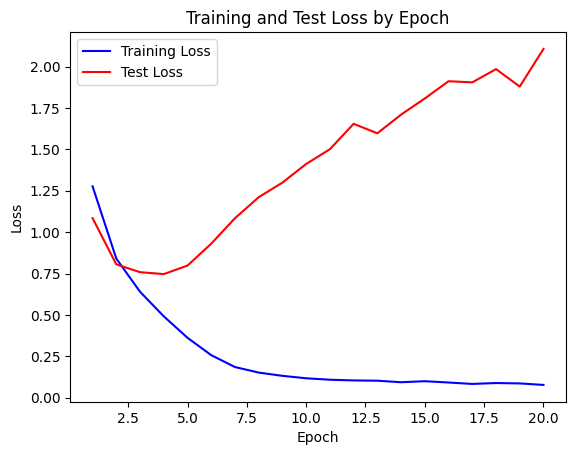

In [11]:
import matplotlib.pyplot as plt

train_loss = log.history['loss']
test_loss = log.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')

plt.title('Training and Test Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

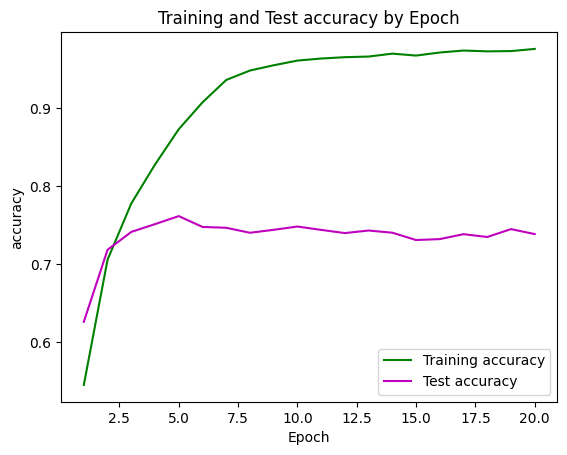

In [12]:
# extract the train and test loss from the log object
train_accuracy = log.history['accuracy']
test_accuracy = log.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, test_accuracy, 'm', label='Test accuracy')

plt.title('Training and Test accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [13]:
car_indices = np.where(y_train == 1)[0]
airplane_indices = np.where(y_train == 0)[0]

# Randomly choose 80% of car and airplane images to keep
keep_car_indices = np.random.choice(car_indices, int(len(car_indices)*0.2), replace=False)
keep_airplane_indices = np.random.choice(airplane_indices, int(len(airplane_indices)*0.2), replace=False)

# Concatenate the indices of the images we want to keep
keep_indices = np.concatenate([keep_car_indices, keep_airplane_indices])

# Filter the original training set to only keep car and airplane images
x_filtered_train = x_train[keep_indices]
y_filtered_train = y_train[keep_indices]

# Print some statistics
print(f"Original training set size: {len(x_train)}")
print(f"Filtered training set size: {len(x_filtered_train)}")

n_classes = len(np.unique(y_train))
for c in [0, 1]:
    original_count = len(np.where(y_train == c)[0])
    filtered_count = len(np.where(y_filtered_train == c)[0])
    if original_count != 0:
        print(f"{filtered_count} out of {original_count} {c}-labelled images kept ({int(filtered_count / original_count * 100)}%)")
    else:
        print(f"No {c}-labelled images found in the original training set.")


Original training set size: 50000
Filtered training set size: 100000
900000 out of 450000 0-labelled images kept (200%)
100000 out of 50000 1-labelled images kept (200%)


In [14]:
# Define the CNN architecture
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_filtered_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))

cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Compile the CNN model
cnn.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

# Train the CNN model
log = cnn.fit(x_filtered_train, y_filtered_train, batch_size=32, epochs=20, validation_data=(x_test,y_test))

# Test the CNN model and calculate the evaluation metrics
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report_filtered = classification_report(y_true, y_pred, target_names=['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'])

print('Classification Report:\n', report_filtered)

Epoch 1/20
3125/3125 [==============================] - 18s 5ms/step - loss: 0.9648 - accuracy: 0.6597 - val_loss: 0.8484 - val_accuracy: 0.7173
Epoch 2/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4249 - accuracy: 0.8585 - val_loss: 0.9835 - val_accuracy: 0.7193
Epoch 3/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2097 - accuracy: 0.9325 - val_loss: 1.1835 - val_accuracy: 0.7241
Epoch 4/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.1325 - accuracy: 0.9571 - val_loss: 1.3234 - val_accuracy: 0.7390
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.1081 - accuracy: 0.9656 - val_loss: 1.5374 - val_accuracy: 0.7301
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0894 - accuracy: 0.9723 - val_loss: 1.6912 - val_accuracy: 0.7278
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0856 - accuracy: 0.9736 - val_loss: 1.9134 - val_ac

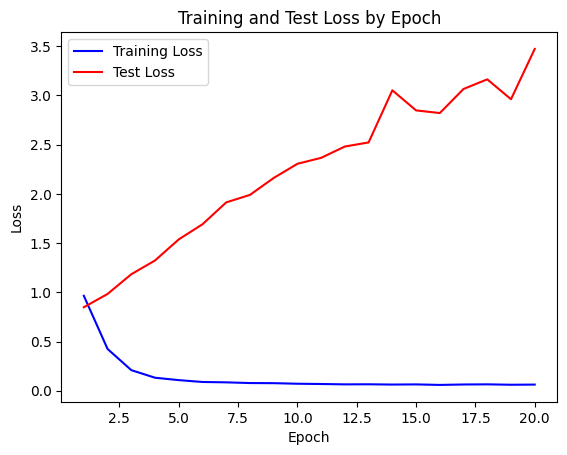

In [15]:
import matplotlib.pyplot as plt

# extract the train and test loss from the log object
train_loss_f = log.history['loss']
test_loss_f = log.history['val_loss']

# create a list of epochs based on the length of the train_loss array
epochs = range(1, len(train_loss) + 1)

# plot the train and test loss on a single graph
plt.plot(epochs, train_loss_f, 'b', label='Training Loss')
plt.plot(epochs, test_loss_f, 'r', label='Test Loss')

# set plot labels, legend, and title
plt.title('Training and Test Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# display the plot
plt.show()

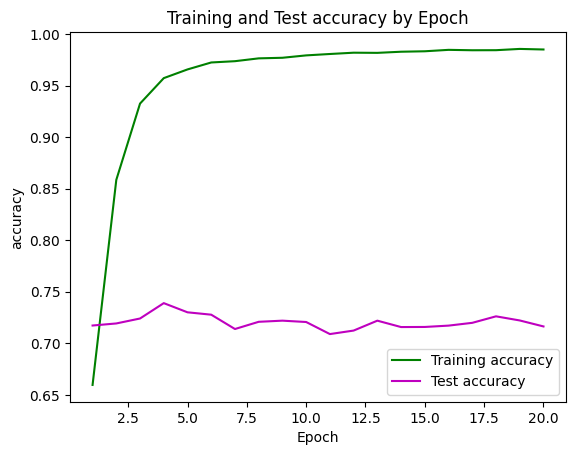

In [16]:
# extract the train and test loss from the log object
train_accuracy_f = log.history['accuracy']
test_accuracy_f = log.history['val_accuracy']

# create a list of epochs based on the length of the train_loss array
epochs = range(1, len(train_loss) + 1)

# plot the train and test loss on a single graph
plt.plot(epochs, train_accuracy_f, 'g', label='Training accuracy')
plt.plot(epochs, test_accuracy_f, 'm', label='Test accuracy')

# set plot labels, legend, and title
plt.title('Training and Test accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

# display the plot
plt.show()

In [17]:
import numpy as np

In an imbalanced dataset, there are significantly more samples for one class than for the others, which can cause the classifier to be biased towards the majority class. In this case, the accuracy metric may not be the best measure of performance since it does not take into account the class distribution.

Metrics such as precision, recall, and F1-score can provide a better understanding of how well the classifier is performing on each individual class. In general, a high precision indicates that the classifier is correctly identifying examples from a particular class, while a high recall indicates that the classifier is correctly identifying all the examples from a particular class.

Balancing the dataset by oversampling or undersampling the minority or majority classes can help address class imbalance issues and result in improved performance on the minority classes.

In [18]:
from keras.preprocessing.image import ImageDataGenerator


train_mask = np.logical_or(y_filtered_train == 1, y_filtered_train == 0)
test_mask = np.logical_or(y_test == 1, y_test == 0)

# Reduce the boolean mask to 1D
train_mask = np.any(train_mask, axis=1)
test_mask = np.any(test_mask, axis=1)

x_filtered_train, y_filtered_train = x_filtered_train[train_mask], y_filtered_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Define data augmentation transformations
datagen_train = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Concatenate augmented training data batches
augmented_x_train = []
augmented_y_train = []
batch_size = 32
for x_batch, y_batch in datagen_train.flow(x_filtered_train, y_filtered_train, batch_size=batch_size):
    augmented_x_train.append(x_batch)
    augmented_y_train.append(y_batch)
    if len(augmented_x_train) * batch_size >= len(x_filtered_train):
        break

x_a_train = np.concatenate(augmented_x_train)
y_a_train = np.concatenate(augmented_y_train)



In [19]:
# Define the CNN architecture
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_a_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))

cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Compile the CNN model
cnn.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

# Train the CNN model
log = cnn.fit(x_a_train, y_a_train, batch_size=32, epochs=20, validation_data=(x_test,y_test))

# Test the CNN model and calculate the evaluation metrics
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report_a = classification_report(y_true, y_pred, target_names=['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'])

print('Classification Report:\n', report_a)

Epoch 1/20
3125/3125 [==============================] - 18s 5ms/step - loss: 1.5973 - accuracy: 0.4204 - val_loss: 1.3916 - val_accuracy: 0.4929
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2769 - accuracy: 0.5448 - val_loss: 1.3484 - val_accuracy: 0.5298
Epoch 3/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0913 - accuracy: 0.6128 - val_loss: 1.2665 - val_accuracy: 0.5652
Epoch 4/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9348 - accuracy: 0.6707 - val_loss: 1.3581 - val_accuracy: 0.5626
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7791 - accuracy: 0.7236 - val_loss: 1.4404 - val_accuracy: 0.5587
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6181 - accuracy: 0.7821 - val_loss: 1.6738 - val_accuracy: 0.5594
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4897 - accuracy: 0.8272 - val_loss: 2.1882 - val_ac

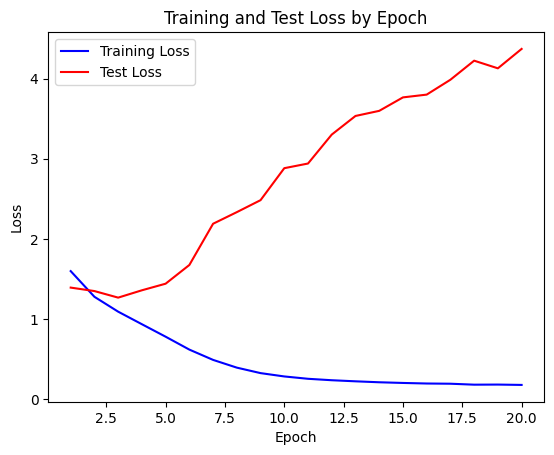

In [20]:
import matplotlib.pyplot as plt

# extract the train and test loss from the log object
train_loss_a = log.history['loss']
test_loss_a = log.history['val_loss']

# create a list of epochs based on the length of the train_loss array
epochs = range(1, len(train_loss) + 1)

# plot the train and test loss on a single graph
plt.plot(epochs, train_loss_a, 'b', label='Training Loss')
plt.plot(epochs, test_loss_a, 'r', label='Test Loss')

# set plot labels, legend, and title
plt.title('Training and Test Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# display the plot
plt.show()

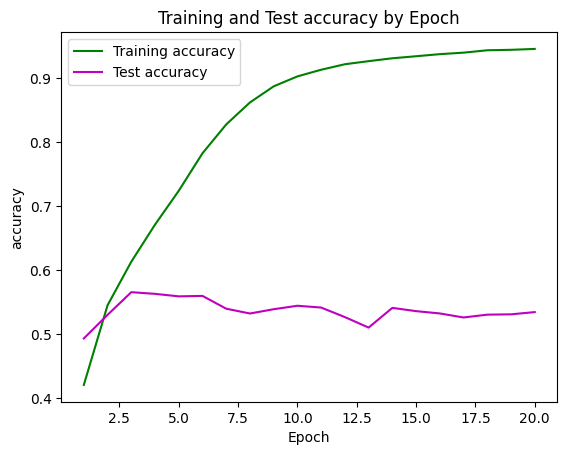

In [21]:
# extract the train and test loss from the log object
train_accuracy_a = log.history['accuracy']
test_accuracy_a = log.history['val_accuracy']

# create a list of epochs based on the length of the train_loss array
epochs = range(1, len(train_loss) + 1)

# plot the train and test loss on a single graph
plt.plot(epochs, train_accuracy_a, 'g', label='Training accuracy')
plt.plot(epochs, test_accuracy_a, 'm', label='Test accuracy')

# set plot labels, legend, and title
plt.title('Training and Test accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

# display the plot
plt.show()

the drpout method and the Batch normalization method has been added to the network to prevent the nural network from over fitting.


In [22]:
from keras.layers import Dropout, BatchNormalization

# Define the CNN architecture
cnn = Sequential()

# First Convolutional Block
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Second Convolutional Block
cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Fully Connected Layer
cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))

# Output layer
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Compile the CNN model
cnn.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

# Train the CNN model
log = cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test,y_test))

# Test the CNN model and calculate the evaluation metrics
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report_r = classification_report(y_true, y_pred, target_names=['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9'])

print('Classification Report:\n', report_r)


Epoch 1/20
1563/1563 [==============================] - 19s 9ms/step - loss: 1.3926 - accuracy: 0.5146 - val_loss: 0.9365 - val_accuracy: 0.6686
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9787 - accuracy: 0.6577 - val_loss: 0.8746 - val_accuracy: 0.6989
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8455 - accuracy: 0.7024 - val_loss: 0.7185 - val_accuracy: 0.7488
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7691 - accuracy: 0.7308 - val_loss: 0.7026 - val_accuracy: 0.7567
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6993 - accuracy: 0.7547 - val_loss: 0.7065 - val_accuracy: 0.7555
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6576 - accuracy: 0.7723 - val_loss: 0.6320 - val_accuracy: 0.7812
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6079 - accuracy: 0.7860 - val_loss: 0.6677 - val_ac

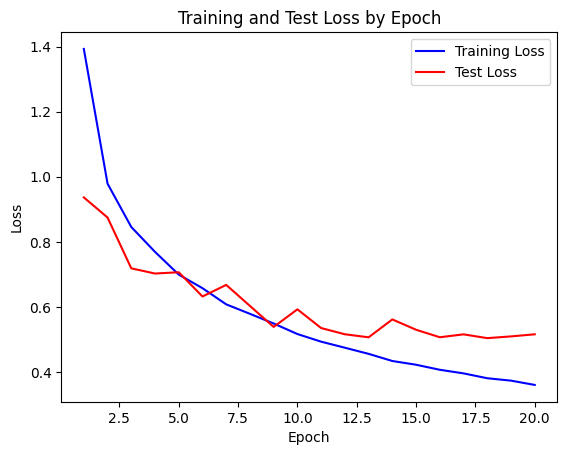

In [23]:
import matplotlib.pyplot as plt

# extract the train and test loss from the log object
train_loss_r = log.history['loss']
test_loss_r = log.history['val_loss']

# create a list of epochs based on the length of the train_loss array
epochs = range(1, len(train_loss) + 1)

# plot the train and test loss on a single graph
plt.plot(epochs, train_loss_r, 'b', label='Training Loss')
plt.plot(epochs, test_loss_r, 'r', label='Test Loss')

# set plot labels, legend, and title
plt.title('Training and Test Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# display the plot
plt.show()

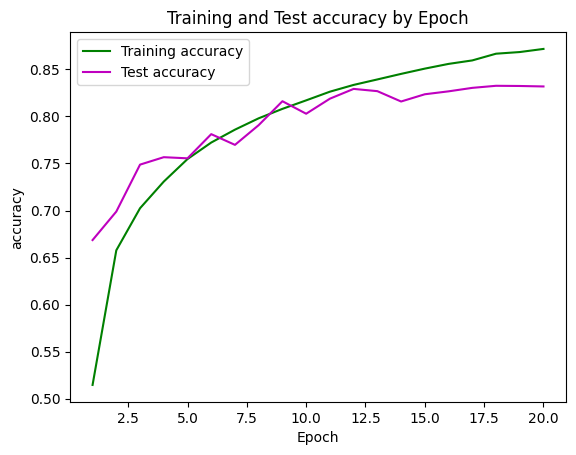

In [24]:
# extract the train and test loss from the log object
train_accuracy_r = log.history['accuracy']
test_accuracy_r = log.history['val_accuracy']

# create a list of epochs based on the length of the train_loss array
epochs = range(1, len(train_loss) + 1)

# plot the train and test loss on a single graph
plt.plot(epochs, train_accuracy_r, 'g', label='Training accuracy')
plt.plot(epochs, test_accuracy_r, 'm', label='Test accuracy')

# set plot labels, legend, and title
plt.title('Training and Test accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

# display the plot
plt.show()